<a href="https://colab.research.google.com/github/Liu-CWB/cwbopendata/blob/master/CWB_NWPOPENDATA_DRAW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Download numerical weather prediction data form CWB opendata website
Example: Download CWB WRF 3km data
Forecast hour: 84
timestamp: every six hours
"""

"""
import requests
urlbase = "https://opendata.cwb.gov.tw/fileapi/opendata/MIC"
dictNwpDataType = {"GFS25KM":"A0060","RFS15KM":"A0061","RFS3KM":"A0064"}

tau = lambda m: "00" + str(m) if m < 10 else "0" + str(m)
for fchr in range(0,85,6):
  filename = "M-{}-{}.grb2".format(dictNwpDataType["RFS3KM"],tau(fchr))
  with open(filename, 'wb') as out:
    url = urlbase + "/" + filename
    r = requests.get(url,stream=True)
    out.write(r.content)
"""

In [1]:
from google.colab import drive
drive.mount("data")

Drive already mounted at data; to attempt to forcibly remount, call drive.mount("data", force_remount=True).


In [14]:
import pygrib as pb

dataPath = "/content/data/My Drive/Datazone"
fnTau12 = pb.open(dataPath + "/" + "M-A0064-012.grb2")
fnTau06 = pb.open(dataPath + "/" + "M-A0064-006.grb2")

gridx = fnTau12.select()[0]["Nx"]
gridy = fnTau12.select()[0]["Ny"]
lat = fnTau12.select()[0]["latitudes"].reshape(gridy,gridx)[150:450,400:800]
lon = fnTau12.select()[0]["longitudes"].reshape(gridy,gridx)[150:450,400:800]
accRain6Hr = fnTau12.select()[61]["values"][150:450,400:800] - \
         fnTau06.select()[61]["values"][150:450,400:800]
u10 = fnTau12.select()[66]["values"][150:450,400:800]*1.944
v10 = fnTau12.select()[67]["values"][150:450,400:800]*1.944
print(accRain6Hr)

[[2.7350e-01 2.2720e-01 4.6090e-01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.4600e-02 2.6200e-01 1.0520e-01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.2000e-03 6.7990e-01 1.2663e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [3.4174e+00 5.2008e+00 5.3883e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.5852e+00 3.5113e+00 4.5535e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.9210e-01 2.0550e+00 3.4436e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


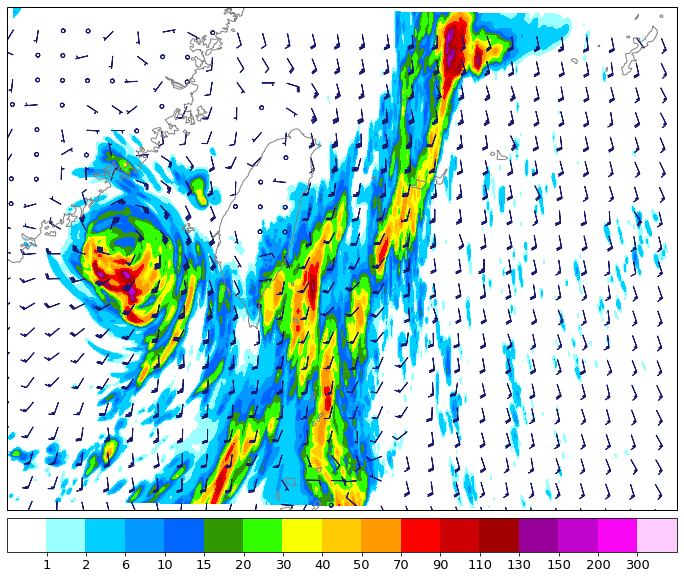

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

lambert = ccrs.LambertConformal(central_longitude=121.76013, \
       central_latitude=24.128498,standard_parallels=(10,40))

fig = plt.figure(figsize=(12,16))
axs = plt.axes(projection=lambert)
dataPath = "/content/data/My Drive/Datazone"
"""
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces',
    scale='10m',
    facecolor='lemonchiffon')
axs.add_feature(states_provinces,edgecolor='k')
"""
shapeFilePath = dataPath + "/shpfile/ne_10m_admin_0_countries.shp"
shape_feature = ShapelyFeature(shpreader.Reader(shapeFilePath).geometries(),\
            ccrs.PlateCarree(),facecolor='none',edgecolor='gray')
axs.add_feature(shape_feature)

cwb_data=['None','#9BFFFF','#00CFFF','#0198FF','#0165FF','#309901','#32FF00','#F8FF00','#FFCB00',\
      '#FF9A00','#FA0300','#CC0003', '#A00000','#98009A','#C304CC','#F805F3','#FECBFF']
clevs = [0,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300,400]
cmaps = mcolors.ListedColormap(cwb_data,'precipitation')
norms = mcolors.BoundaryNorm(clevs, cmaps.N)
ctf = plt.contourf(lon,lat,accRain6Hr,clevs,cmap=cmaps,norm=norms,transform=ccrs.PlateCarree())

cbar = plt.colorbar(ctf,orientation="horizontal",ticks=clevs[1:len(clevs)-1],pad=0.01)
cbar.ax.tick_params(labelsize=13)
plt.barbs(lon[::15,::15],lat[::15,::15],u10[::15,::15],v10[::15,::15],length=5,\
          color="midnightblue",transform=ccrs.PlateCarree())
#ax.add_feature(shape_feature)

plt.show()